In [1]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
 

In [2]:
#IMPORTING DATABASE
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [107]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [108]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


EXPLORATORY   DATA    ANALYSIS    (EDA)

In [5]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns. Out of which 1 column is target variable and remaining 11 column are independent variables

In [109]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [110]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

There are total 13 columns out of 12 are independent variable and 1 is target variable

In [111]:
# Checking types of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [112]:
# Checking null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in any of column

In [113]:
df.isnull().sum().sum()

0

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we see there are no null values present in database with 11 columns as float64 data type and 1 column with int64 data type

In [115]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [116]:
# There are no null values in any column 
# Mean is slightly more than median measn distribution is positively skewed


<Axes: >

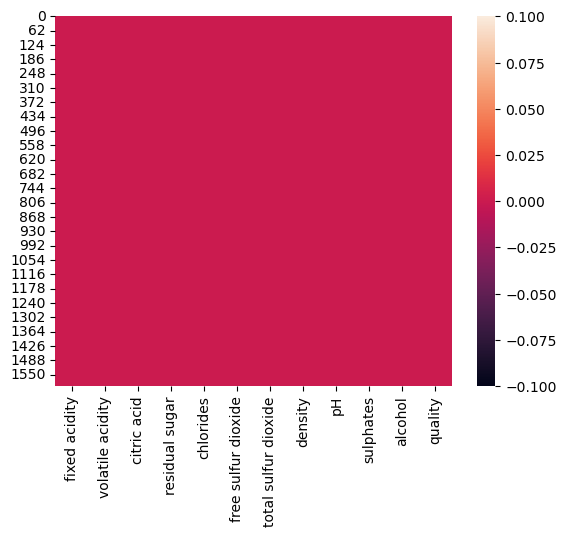

In [3]:
# Lets visualise  database with heatmap
sns.heatmap(df.isnull())

This heatmap shows there are no misssing values in dataset

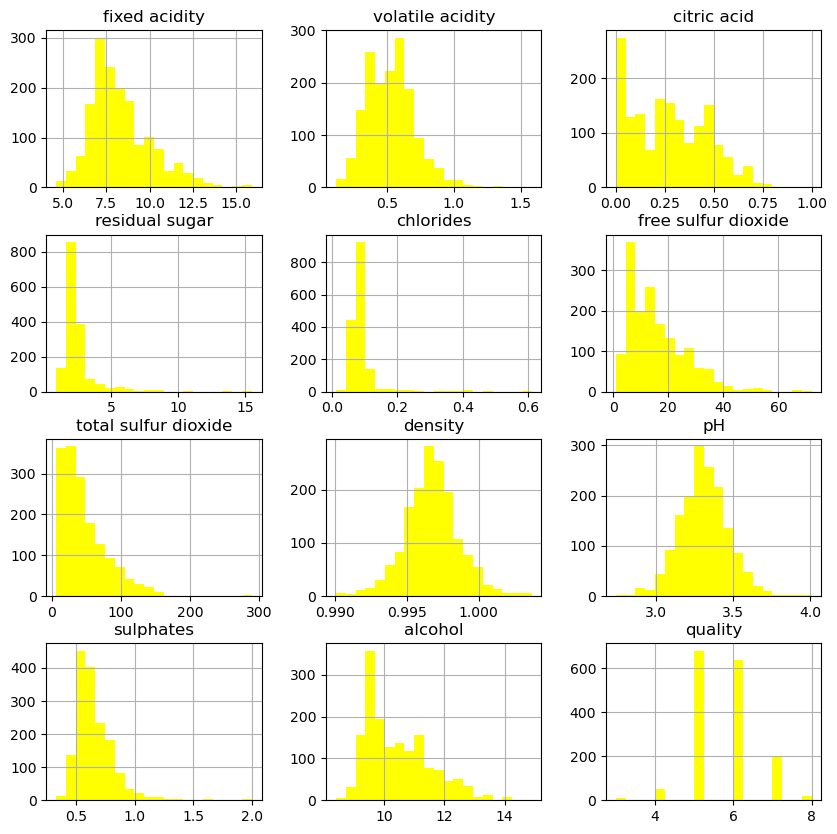

In [4]:
df.hist(bins=20, figsize=(10, 10),facecolor= "yellow")
plt.show()

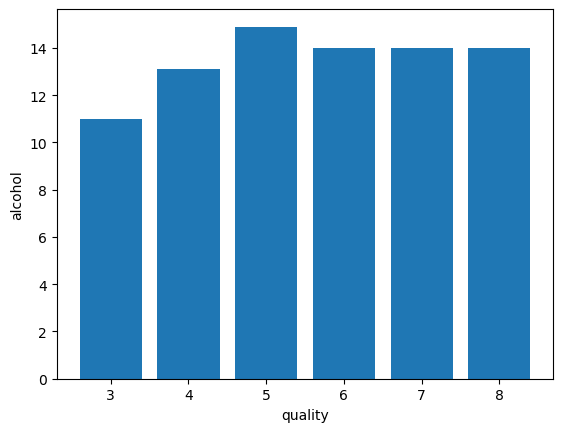

In [119]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

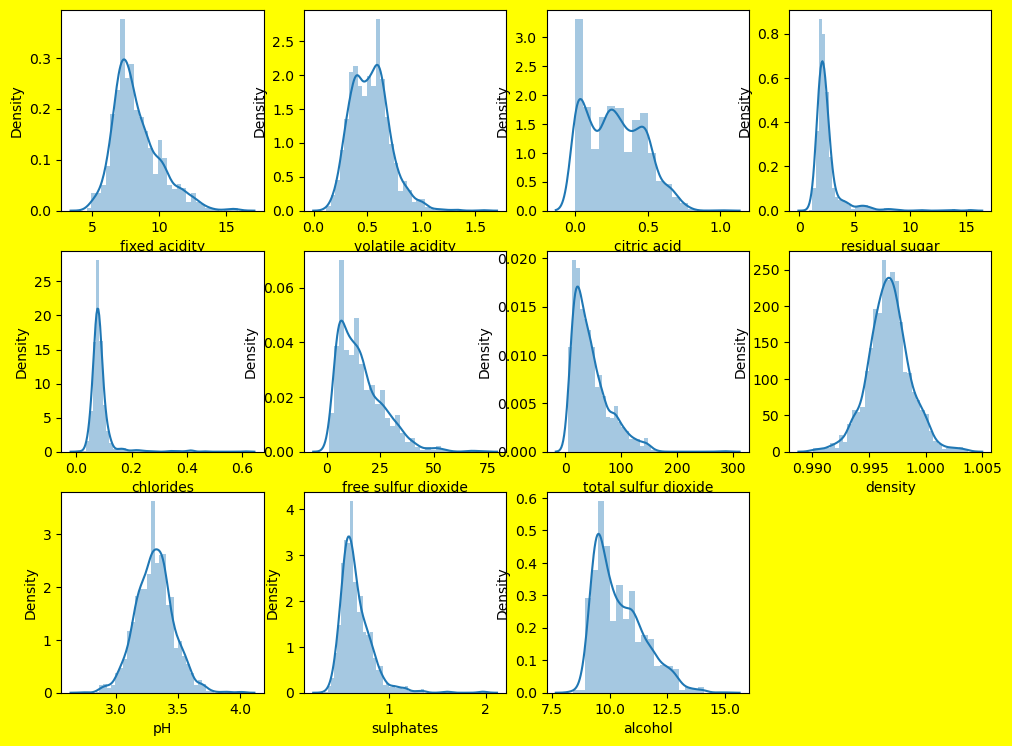

In [12]:
plt.figure(figsize=(12, 12),facecolor="yellow")
plotnumber=1

for column in df:
    if plotnumber <= 11:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [121]:
# the graph looks fairly positively distributed 

In [122]:
df_features=df.drop("quality",axis=1)

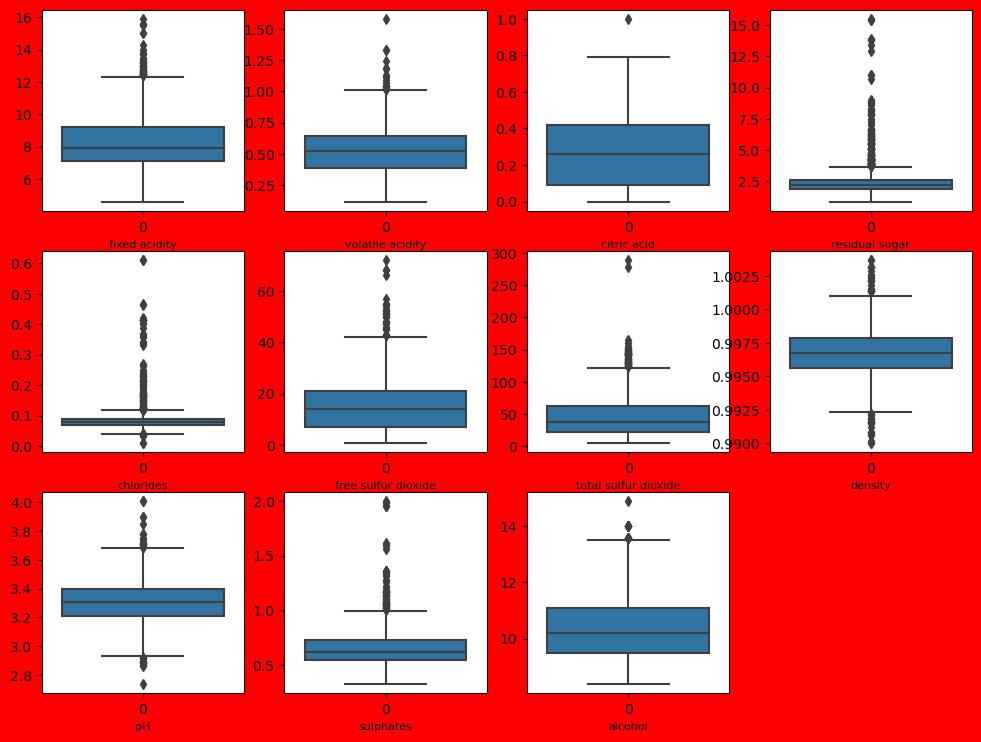

In [123]:
# Visualise the outlier using boxplot

plt.figure(figsize=(12, 12),facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=8)
        plotnumber+=1
plt.show()        

In [21]:
# outliers are present so we have to deal with them

In [124]:
df.shape

(1599, 12)

In [125]:
# Find the IQR to find outliers
# 1st Quantile
q1=df.quantile(0.25)

# 3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3-q1


In [126]:
q1

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 0.25, dtype: float64

In [127]:
q3

fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64

In [128]:
iqr

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64

In [4]:
fac=((q3.fixed acidity) + (1.5 * iqr.fixed acidity ))
fac

index=np.where(df['fixed acidity']>fac)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1058256937.py, line 1)

In [ ]:
vac=((q3.volatile acidity) + (1.5 * iqr.volatile acidity ))
vac

index=np.where(df['volatile acidity']>vac)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

In [ ]:
cac=((q3.citric acid) + (1.5 * iqr.citric acid ))
cac

index=np.where(df['citric acid']>cac)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

In [ ]:
rsc=((q3.residual sugar) + (1.5 * iqr.residual sugar ))
rsc

index=np.where(df['residual sugar']>rsc)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

In [ ]:
fsd=((q3.free sulfur dioxide) + (1.5 * iqr.free sulfur dioxide ))
fsd

index=np.where(df['free sulfur dioxide']>fsd)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

In [ ]:
tsd=((q3.total sulfur dioxide) + (1.5 * iqr.total sulfur dioxide ))
tsd

index=np.where(df['total sulfur dioxide']>tsd)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

In [141]:
chl=((q3.chlorides ) + (1.5 * iqr.chlorides ))
chl 

index=np.where(df['chlorides']>chl)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1496, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1492,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1493,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1494,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [142]:
den=((q3.density ) + (1.5 * iqr.density ))
den

index=np.where(df['density']>den)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1477, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1473,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1474,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1475,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [143]:
ph=((q3.pH) + (1.5 * iqr.pH))
ph 

index=np.where(df['pH']>ph)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1456, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1452,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1453,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1454,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [144]:
sul=((q3.sulphates) + (1.5 * iqr.sulphates))
sul 

index=np.where(df['sulphates']>sul)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1426, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1422,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1423,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1424,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [145]:
alc=((q3.alcohol) + (1.5 * iqr.alcohol))
alc 

index=np.where(df['alcohol']>alc)


df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1416, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1412,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1413,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1414,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


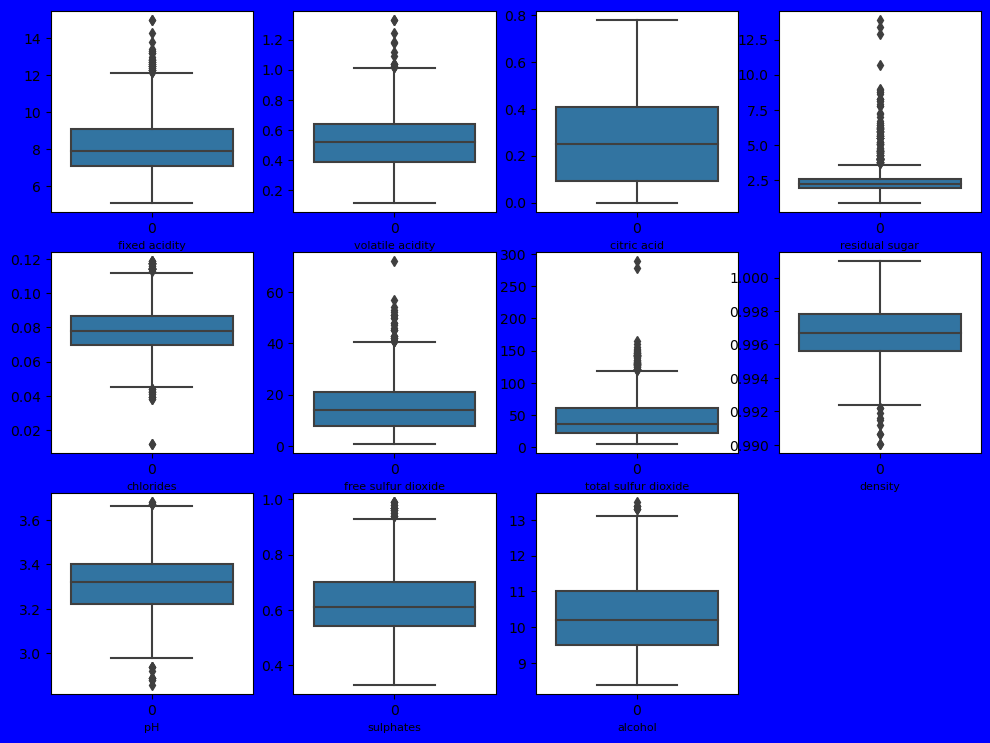

In [146]:
# Visualise the outlier using boxplot after removing outliers

plt.figure(figsize=(12, 12),facecolor='blue')
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=8)
        plotnumber+=1
plt.show()    

In [147]:
corr = df.corr()
corr


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.262999,0.668223,0.039626,0.191368,-0.163346,-0.116618,0.629922,-0.680018,0.211305,-0.037486,0.144674
volatile acidity,-0.262999,1.000000,-0.582276,0.002483,0.135704,-0.024173,0.069787,0.038378,0.248396,-0.339612,-0.207733,-0.386338
citric acid,0.668223,-0.582276,1.000000,0.144189,0.056545,-0.062191,0.041317,0.330707,-0.507103,0.288188,0.160645,0.251945
residual sugar,0.039626,0.002483,0.144189,1.000000,0.105345,0.109882,0.201848,0.246639,-0.040290,0.010099,0.110607,0.022692
chlorides,0.191368,0.135704,0.056545,0.105345,1.000000,-0.005487,0.092877,0.423337,-0.162435,-0.048086,-0.288153,-0.176425
free sulfur dioxide,-0.163346,-0.024173,-0.062191,0.109882,-0.005487,1.000000,0.656358,-0.058295,0.089976,0.045465,-0.054727,-0.017535
total sulfur dioxide,-0.116618,0.069787,0.041317,0.201848,0.092877,0.656358,1.000000,0.062131,-0.051686,-0.092508,-0.220528,-0.183153
density,0.629922,0.038378,0.330707,0.246639,0.423337,-0.058295,0.062131,1.000000,-0.245894,0.136530,-0.502401,-0.185425
pH,-0.680018,0.248396,-0.507103,-0.040290,-0.162435,0.089976,-0.051686,-0.245894,1.000000,0.005381,0.116928,-0.096156
sulphates,0.211305,-0.339612,0.288188,0.010099,-0.048086,0.045465,-0.092508,0.136530,0.005381,1.000000,0.248547,0.408874


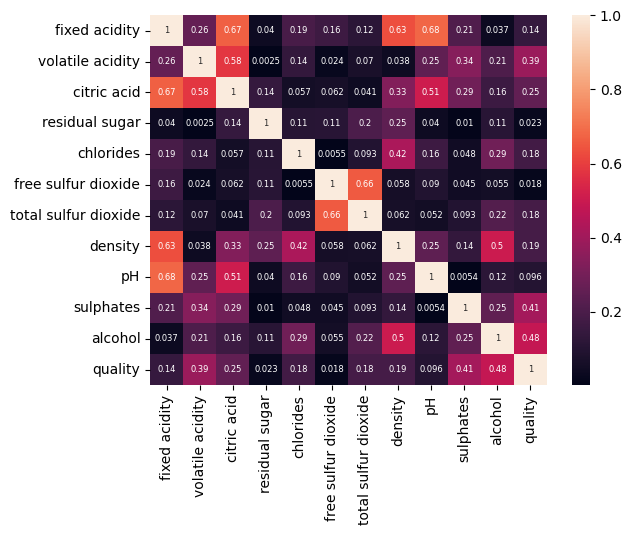

In [148]:
df_corr = df.corr().abs()
sns.heatmap(df_corr,annot=True,annot_kws={'size':6})
plt.show()

In [149]:
X=df.drop(columns=["quality"])
Y=df["quality"]

In [150]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [151]:
# Create Classification version of target variable
df['wine_goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [152]:
# Separate feature variables and target variable
X = df.drop(['quality','wine_goodquality'], axis = 1)
Y = df['wine_goodquality']

In [153]:
# See proportion of good vs bad wines
df['wine_goodquality'].value_counts()

wine_goodquality
0    1229
1     187
Name: count, dtype: int64

In [154]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [155]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: wine_goodquality, Length: 1416, dtype: int64

In [156]:
#  To check multicollinearity

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [157]:
X_scaled.shape[1]

11

In [158]:
# Finding variance inflation factor in each scaled column
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i)
            for i in range(X_scaled.shape[1])]
vif["Featues"]=X.columns

In [159]:
# Lets check the values
vif

,vif,Featues
0,7.231163,fixed acidity
1,1.886811,volatile acidity
2,3.104082,citric acid
3,1.551731,residual sugar
4,1.308194,chlorides
5,1.945287,free sulfur dioxide
6,2.231331,total sulfur dioxide
7,6.220952,density
8,3.138701,pH
9,1.369032,sulphates


LOGISTIC REGRESSION

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=355)

MODEL BUILIDING

In [161]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [162]:
Y_pred=log_reg.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [163]:
log_reg.predict_proba(X_test)

array([[9.41244715e-01, 5.87552852e-02],
       [9.26499197e-01, 7.35008031e-02],
       [9.92709475e-01, 7.29052531e-03],
       [3.82691501e-01, 6.17308499e-01],
       [9.57463181e-01, 4.25368192e-02],
       [9.92166501e-01, 7.83349907e-03],
       [7.51225112e-01, 2.48774888e-01],
       [7.89417876e-01, 2.10582124e-01],
       [9.82316766e-01, 1.76832340e-02],
       [3.26717961e-01, 6.73282039e-01],
       [4.06830427e-01, 5.93169573e-01],
       [9.75013745e-01, 2.49862549e-02],
       [9.89307585e-01, 1.06924150e-02],
       [8.51898913e-01, 1.48101087e-01],
       [8.18901316e-01, 1.81098684e-01],
       [2.91471019e-01, 7.08528981e-01],
       [9.59836251e-01, 4.01637490e-02],
       [5.82205462e-01, 4.17794538e-01],
       [9.92872321e-01, 7.12767870e-03],
       [8.82333708e-01, 1.17666292e-01],
       [9.75942076e-01, 2.40579239e-02],
       [8.65642336e-01, 1.34357664e-01],
       [9.94542120e-01, 5.45787999e-03],
       [8.37708875e-01, 1.62291125e-01],
       [9.823167

In [164]:
# Confusion Matrix
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat

array([[300,  15],
       [ 25,  14]], dtype=int64)

In [165]:
# Model accuracy

accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8870056497175142

In [166]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       315
           1       0.48      0.36      0.41        39

    accuracy                           0.89       354
   macro avg       0.70      0.66      0.67       354
weighted avg       0.87      0.89      0.88       354



In [175]:
# ROC Curve
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

In [176]:
print("Threshold = ",thresholds)
print("TRUE POSITIVE RATE = ",tpr)
print("FALSE POSITIVE RATE = ",fpr)

Threshold =  [inf  1.  0.]
TRUE POSITIVE RATE =  [0.         0.35897436 1.        ]
FALSE POSITIVE RATE =  [0.         0.04761905 1.        ]


TypeError: 'function' object is not subscriptable

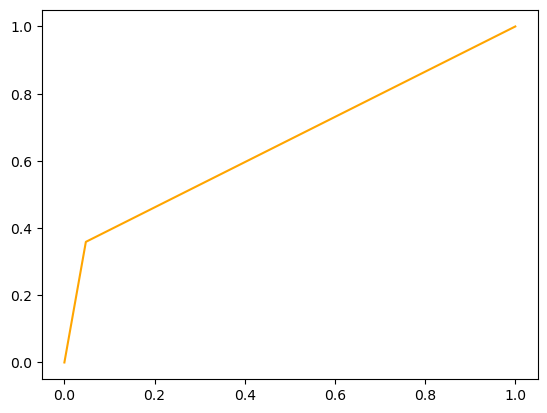

In [177]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot[0,1],[0,1],color=='darkblue',linestyle=='--'
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("RECEIVER OPERATING CHARACTERISTIC(ROC)CURVE")
plt.legend()
plt.show()

In [178]:
# how much area it is covering(AUC)
auc_score=roc_auc_score(Y_test,Y_pred)
print(auc_score)

0.6556776556776557


KNN model building

In [179]:
from sklearn.neighbors import KNeighborsClassifier
dataknn = KNeighborsClassifier(n_neighbors=3)
dataknn.fit(X_train,Y_train)
y_pred2 =  dataknn.predict(X_test)


print("Accuracy Score By KNN:",accuracy_score(Y_test,y_pred2))

Accuracy Score By KNN: 0.8785310734463276


USING SVC

In [172]:
from sklearn.svm import SVC
datasvc = SVC()
datasvc.fit(X_train,Y_train)
y_pred3 = datasvc.predict(X_test)


print("Accuracy Score By SVC:",accuracy_score(Y_test,y_pred3))

Accuracy Score By SVC: 0.903954802259887


USING DECISION TREE

In [180]:
datadt = DecisionTreeClassifier(criterion='entropy',random_state=7)
datadt.fit(X_train,Y_train)
Y_pred4 = datadt.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test,Y_pred4))

Accuracy Score: 0.8785310734463276


USING RANDOM FOREST

In [181]:
from sklearn.ensemble import RandomForestClassifier
datarf = RandomForestClassifier(random_state=1)
datarf.fit(X_train, Y_train)
y_pred5 = datarf.predict(X_test)


print("Accuracy Score By Random Forest:",accuracy_score(Y_test,y_pred5))

Accuracy Score By Random Forest: 0.9322033898305084


USING XGBOOST

In [182]:
!pip install xgboost

In [183]:
import xgboost as xgb
dataxgb = xgb.XGBClassifier(random_state=1)
dataxgb.fit(X_train, Y_train)
Y_pred6 = dataxgb.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score By XGBOOST:",accuracy_score(Y_test,Y_pred6))

Accuracy Score By XGBOOST: 0.9209039548022598


In [3]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'Random Forest','Xgboost'],
    'Score': [0.88,0.87,0.90,0.87,0.93,0.92]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df


,Model
Score,
0.93,Random Forest
0.92,Xgboost
0.90,SVC
0.88,Logistic Regression
0.87,KNN
0.87,Decision Tree


Hence , we have to use Random Forest alogorithm  